# import libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler , OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, classification_report , confusion_matrix,accuracy_score
import joblib
from sklearn.feature_selection import chi2 , f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# read dataset

In [2]:
FILE_PATH = os.path.join(os.getcwd() ,".." ,"survey lung cancer", "survey lung cancer.csv")
df = pd.read_csv(FILE_PATH)
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]

* make it 0 and 1 

In [3]:
df = df.replace({1: 0, 2: 1},)

# Save the modified dataset
df.to_csv("updated_data.csv", index=False)

print("Values swapped successfully for the entire dataset!")

Values swapped successfully for the entire dataset!


In [4]:
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        0               1        1              0   
1        M   74        1               0        0              0   
2        F   59        0               0        0              1   
3        M   63        1               1        1              0   
4        F   63        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
304      F   56        0               0        0              1   
305      M   70        1               0        0              0   
306      M   58        1               0        0              0   
307      M   67        1               0        1              0   
308      M   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1         1         1         0                  0   
2                  0         1         0         1                  0   
3                  0         0         0         0                  1   
4                  0         0         0         1                  0   
..               ...       ...       ...       ...                ...   
304                1         1         0         0                  1   
305                0         1         1         1                  1   
306                0         0         1         1                  1   
307                0         1         1         0                  1   
308                0         1         1         1                  1   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           1                    1                      1           1   
1           0                    1                      1           1   
2           1                    1                      0           1   
3           0                    0                      1           1   
4           1                    1                      0           0   
..        ...                  ...                    ...         ...   
304         1                    1                      1           0   
305         1                    1                      0           1   
306         1                    0                      0           1   
307         1                    1                      0           1   
308         0                    0                      1           0   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]

In [5]:
df.rename(columns={
    "CHRONIC DISEASE": "CHRONIC_DISEASE",
    "ALCOHOL CONSUMING": "ALCOHOL_CONSUMING",
    "SHORTNESS OF BREATH": "SHORTNESS_OF_BREATH",
    "SWALLOWING DIFFICULTY": "SWALLOWING_DIFFICULTY",
    "CHEST PAIN": "CHEST_PAIN"
}, inplace=True)


In [8]:
df.drop(columns=["FATIGUE ","ALLERGY "], inplace=True)

In [9]:
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        0               1        1              0   
1        M   74        1               0        0              0   
2        F   59        0               0        0              1   
3        M   63        1               1        1              0   
4        F   63        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
304      F   56        0               0        0              1   
305      M   70        1               0        0              0   
306      M   58        1               0        0              0   
307      M   67        1               0        1              0   
308      M   62        0               0        0              1   

     CHRONIC_DISEASE  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                  0         1                  1         1   
1                  1         0                  0         0   
2                  0         1                  0         1   
3                  0         0                  1         0   
4                  0         1                  0         1   
..               ...       ...                ...       ...   
304                1         0                  1         1   
305                0         1                  1         1   
306                0         1                  1         1   
307                0         0                  1         1   
308                0         1                  1         0   

     SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                      1                      1           1         YES  
1                      1                      1           1         YES  
2                      1                      0           1          NO  
3                      0                      1           1          NO  
4                      1                      0           0          NO  
..                   ...                    ...         ...         ...  
304                    1                      1           0         YES  
305                    1                      0           1         YES  
306                    0                      0           1         YES  
307                    1                      0           1         YES  
308                    0                      1           0         YES  

[309 rows x 14 columns]

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   WHEEZING               309 non-null    int64 
 8   ALCOHOL_CONSUMING      309 non-null    int64 
 9   COUGHING               309 non-null    int64 
 10  SHORTNESS_OF_BREATH    309 non-null    int64 
 11  SWALLOWING_DIFFICULTY  309 non-null    int64 
 12  CHEST_PAIN             309 non-null    int64 
 13  LUNG_CANCER            309 non-null    object
dtypes: int64(12), object(2)
memory usage: 33.9+ KB


In [12]:
df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    0.563107        0.569579    0.498382       0.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    0.000000        0.000000    0.000000       0.000000   
25%     57.000000    0.000000        0.000000    0.000000       0.000000   
50%     62.000000    1.000000        1.000000    0.000000       1.000000   
75%     69.000000    1.000000        1.000000    1.000000       1.000000   
max     87.000000    1.000000        1.000000    1.000000       1.000000   

       CHRONIC_DISEASE    WHEEZING  ALCOHOL_CONSUMING    COUGHING  \
count       309.000000  309.000000         309.000000  309.000000   
mean          0.504854    0.556634           0.556634    0.579288   
std           0.500787    0.497588           0.497588    0.494474   
min           0.000000    0.000000           0.000000    0.000000   
25%           0.000000    0.000000           0.000000    0.000000   
50%           1.000000    1.000000           1.000000    1.000000   
75%           1.000000    1.000000           1.000000    1.000000   
max           1.000000    1.000000           1.000000    1.000000   

       SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  
count           309.000000             309.000000  309.000000  
mean              0.640777               0.469256    0.556634  
std               0.480551               0.499863    0.497588  
min               0.000000               0.000000    0.000000  
25%               0.000000               0.000000    0.000000  
50%               1.000000               0.000000    1.000000  
75%               1.000000               1.000000    1.000000  
max               1.000000               1.000000    1.000000

In [13]:
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        0               1        1              0   
1        M   74        1               0        0              0   
2        F   59        0               0        0              1   
3        M   63        1               1        1              0   
4        F   63        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
304      F   56        0               0        0              1   
305      M   70        1               0        0              0   
306      M   58        1               0        0              0   
307      M   67        1               0        1              0   
308      M   62        0               0        0              1   

     CHRONIC_DISEASE  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                  0         1                  1         1   
1                  1         0                  0         0   
2                  0         1                  0         1   
3                  0         0                  1         0   
4                  0         1                  0         1   
..               ...       ...                ...       ...   
304                1         0                  1         1   
305                0         1                  1         1   
306                0         1                  1         1   
307                0         0                  1         1   
308                0         1                  1         0   

     SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                      1                      1           1         YES  
1                      1                      1           1         YES  
2                      1                      0           1          NO  
3                      0                      1           1          NO  
4                      1                      0           0          NO  
..                   ...                    ...         ...         ...  
304                    1                      1           0         YES  
305                    1                      0           1         YES  
306                    0                      0           1         YES  
307                    1                      0           1         YES  
308                    0                      1           0         YES  

[309 rows x 14 columns]

# EDA

In [14]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [15]:
df["LUNG_CANCER"].value_counts(normalize=True)

LUNG_CANCER
YES    0.873786
NO     0.126214
Name: proportion, dtype: float64

In [16]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

* visualization

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC_DISEASE'}>],
       [<Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL_CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS_OF_BREATH'}>,
        <Axes: title={'center': 'SWALLOWING_DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST_PAIN'}>]], dtype=object)

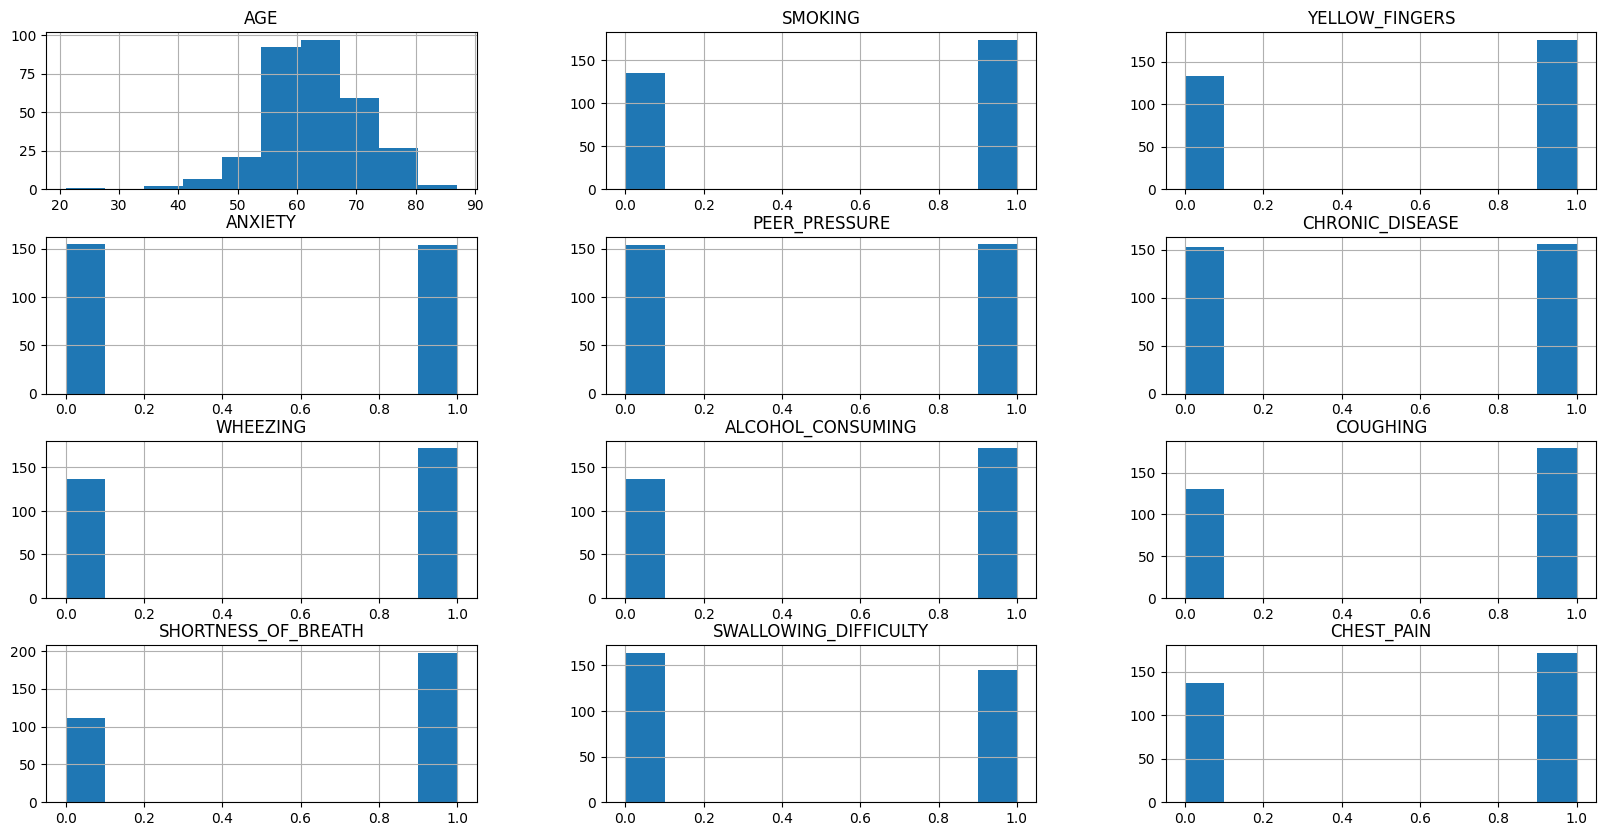

In [17]:
df.hist(figsize=(20,10))

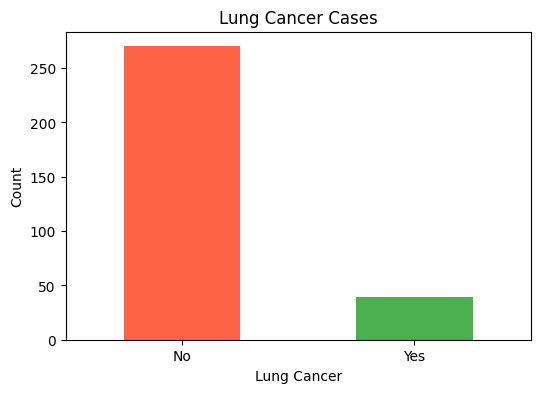

In [18]:
plt.figure(figsize=(6, 4))
df['LUNG_CANCER'].value_counts().plot(kind='bar', color=['#FF6347', '#4CAF50'])
plt.title("Lung Cancer Cases")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.xlabel("Lung Cancer")
plt.ylabel("Count")
plt.show()


<Figure size 600x400 with 0 Axes>

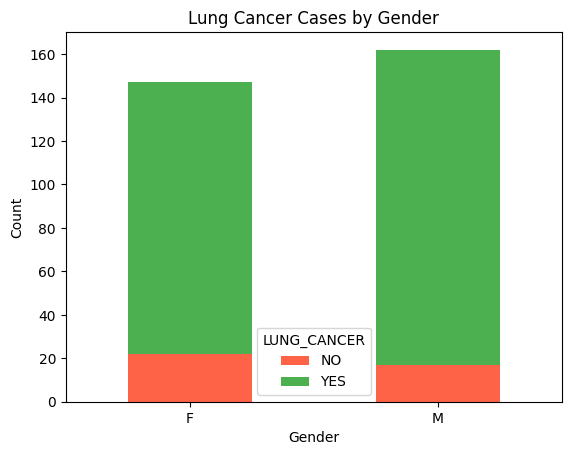

In [19]:
plt.figure(figsize=(6, 4))
df.groupby('GENDER')['LUNG_CANCER'].value_counts().unstack().plot(kind='bar', stacked=True, color=['#FF6347', '#4CAF50'])
plt.title("Lung Cancer Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


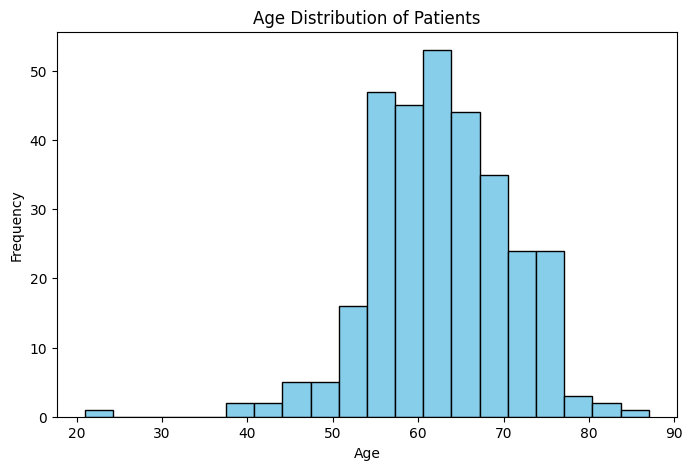

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [21]:
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        0               1        1              0   
1      M   74        1               0        0              0   
2      F   59        0               0        0              1   
3      M   63        1               1        1              0   
4      F   63        0               1        0              0   

   CHRONIC_DISEASE  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                0         1                  1         1   
1                1         0                  0         0   
2                0         1                  0         1   
3                0         0                  1         0   
4                0         1                  0         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    1                      1           1         YES  
1                    1                      1           1         YES  
2                    1                      0           1          NO  
3                    0                      1           1          NO  
4                    1                      0           0          NO

In [22]:
#split to x and y 
X = df.drop(columns=["LUNG_CANCER"], axis=1)
y= df["LUNG_CANCER"]

In [23]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , stratify=y , random_state=42)

In [ ]:
#print shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(247, 13)
(62, 13)
(247,)
(62,)


In [25]:
y_train.value_counts(normalize=True)

LUNG_CANCER
YES    0.874494
NO     0.125506
Name: proportion, dtype: float64

# feature selection

In [26]:
X_train

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
26       F   61        1               1        1              0   
47       F   64        1               1        0              1   
198      F   73        1               1        1              0   
90       F   62        0               0        0              1   
303      M   51        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
171      F   57        0               1        1              0   
32       M   56        1               1        1              0   
77       M   56        1               0        0              0   
146      M   51        0               1        0              0   
280      F   59        1               0        0              0   

     CHRONIC_DISEASE  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
26                 0         0                  1         0   
47                 0         1                  1         1   
198                1         0                  1         0   
90                 0         1                  1         0   
303                1         1                  1         1   
..               ...       ...                ...       ...   
171                0         0                  0         1   
32                 0         0                  0         0   
77                 0         1                  1         1   
146                1         1                  1         1   
280                1         0                  0         0   

     SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  
26                     1                      1           1  
47                     0                      1           1  
198                    0                      0           0  
90                     0                      1           1  
303                    1                      0           1  
..                   ...                    ...         ...  
171                    0                      0           0  
32                     1                      1           0  
77                     1                      0           1  
146                    1                      0           1  
280                    1                      0           0  

[247 rows x 13 columns]

In [27]:
categ_columns= ["GENDER"]
num_columns = df.select_dtypes(include=['number']).columns.tolist()
print(num_columns)
print(categ_columns)

['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
['GENDER']


In [28]:
_, p_val = f_classif(X=X_train[num_columns], y=y_train)
p_val < 1 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# preprocessing

In [29]:
#pipeline
#numericl --> imputing using median
# categ --> imputing using mode and one hot encodeing

#for numerical
num_pipeline= Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]   
)
#fro categ
cat_pipline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(sparse_output=False, drop="first"))   
    ]
    
)
preprocessor= ColumnTransformer(transformers=[
        ("num", num_pipeline, num_columns),
        ("cate",cat_pipline ,categ_columns), 
    ]
)

#apply
X_train_final= preprocessor.fit_transform(X_train)
X_test_final= preprocessor.transform(X_test)

In [30]:
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                                  'PEER_PRESSURE', 'CHRONIC_DISEASE',
                                  'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING',
                                  'SHORTNESS_OF_BREATH',
                                  'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']),
                                ('cate',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['GENDER'])])

In [31]:
print(X_train_final.shape)
print(X_train.shape)
print(X_test_final.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(247, 13)
(247, 13)
(62, 13)
(62, 13)
(247,)
(62,)


In [32]:
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), ".." , "artifacts") 
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

In [33]:
#dump pipeline
joblib.dump(preprocessor, os.path.join(ARTIFACTS_FOLDER_PATH, "preprocessor.pkl"))

['d:\\Me\\depi\\projects\\lung cancer\\notebook\\..\\artifacts\\preprocessor.pkl']

# deal with imbalancing data

In [34]:
over = SMOTE(sampling_strategy=0.7 , random_state=42)
X_train_resample , y_train_resample =over.fit_resample(X_train_final, y_train)

In [35]:
y_train_resample.value_counts()

LUNG_CANCER
YES    216
NO     151
Name: count, dtype: int64

# building model

In [41]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42 , n_jobs=-1, max_depth=3) 
lg_model = LogisticRegression(max_iter=1000, random_state=42)


In [42]:
# Train Random Forest
rf_model.fit(X_train_resample, y_train_resample)

# Train Logistic Regression
lg_model.fit(X_train_resample, y_train_resample)


LogisticRegression(max_iter=1000, random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test_final)
y_pred_lg = lg_model.predict(X_test_final)


In [44]:
# Evaluate Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))


Random Forest Performance:
Accuracy: 0.8548387096774194
              precision    recall  f1-score   support

          NO       0.44      0.50      0.47         8
         YES       0.92      0.91      0.92        54

    accuracy                           0.85        62
   macro avg       0.68      0.70      0.69        62
weighted avg       0.86      0.85      0.86        62


Logistic Regression Performance:
Accuracy: 0.8870967741935484
              precision    recall  f1-score   support

          NO       0.55      0.75      0.63         8
         YES       0.96      0.91      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.83      0.78        62
weighted avg       0.91      0.89      0.89        62



In [46]:
#dumb rf model
joblib.dump(rf_model, os.path.join(ARTIFACTS_FOLDER_PATH, "rf_model.pkl"))
joblib.dump(lg_model, os.path.join(ARTIFACTS_FOLDER_PATH, "lg_model.pkl"))

['d:\\Me\\depi\\projects\\lung cancer\\notebook\\..\\artifacts\\lg_model.pkl']